In [12]:
''' Discard all warnings in Jupyter Notebook'''
import warnings
warnings.filterwarnings('ignore')

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [14]:
dftrain = pd.read_csv("Data/FINAL_CSV/train70_reduced.csv") 
dftrain_roc = dftrain
dftrain = dftrain[0:14000]
dftrain.head()

,tcp.flags,tcp.time_delta,tcp.len,mqtt.conack.flags,mqtt.conack.flags.reserved,mqtt.conack.flags.sp,mqtt.conack.val,mqtt.conflag.cleansess,mqtt.conflag.passwd,mqtt.conflag.qos,...,mqtt.qos,mqtt.retain,mqtt.sub.qos,mqtt.suback.qos,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len,target
0,0x00000018,0.998867,10,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
1,0x00000010,0.000067,1460,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
2,0x00000010,0.000058,1460,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
3,0x00000018,0.000227,10,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
4,0x00000018,0.000236,16,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos


In [15]:
dftest = pd.read_csv("Data/FINAL_CSV/test30_reduced.csv")
dftest_roc = dftest
# dftest = dftest[0:36000]
dftest.head()

,tcp.flags,tcp.time_delta,tcp.len,mqtt.conack.flags,mqtt.conack.flags.reserved,mqtt.conack.flags.sp,mqtt.conack.val,mqtt.conflag.cleansess,mqtt.conflag.passwd,mqtt.conflag.qos,...,mqtt.qos,mqtt.retain,mqtt.sub.qos,mqtt.suback.qos,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len,target
0,0x00000014,0.029854,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malformed
1,0x00000018,0.000001,51,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
2,0x00000018,0.999820,13,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
3,0x00000012,0.007949,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malformed
4,0x00000010,0.000121,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos


In [16]:
encoder = LabelEncoder()
dftrain['target'] = encoder.fit_transform(dftrain['target'])
encoder.classes_

array(['bruteforce', 'ddos', 'flood', 'legitimate', 'malformed',
       'slowite'], dtype=object)

In [17]:
for column in dftrain.columns:
    if dftrain[column].dtype == type(object):
        labelencoder = LabelEncoder()
        dftrain[column] = labelencoder.fit_transform(dftrain[column])

X_train = dftrain.drop("target",axis = 'columns')
y_train = dftrain["target"]

In [18]:
for column in dftest.columns:
    if dftest[column].dtype == type(object):
        labelencoder = LabelEncoder()
        dftest[column] = labelencoder.fit_transform(dftest[column])

X_test = dftest.drop("target",axis = 'columns')
y_test = dftest["target"]

In [19]:
X_train1 = X_train[1:70000]
y_train1 = y_train[1:70000]

X_train2 = X_train[70001:140000]
y_train2 = y_train[70001:140000]

X_train3 = X_train[140000:210000]
y_train3 = y_train[140000:210000]

In [20]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Definicja bazowych modeli
knn_classifier = KNeighborsClassifier(n_neighbors=32)
svm_classifier = SVC(kernel='sigmoid')
rf_classifier = RandomForestClassifier(n_estimators= 100, 
                                       max_depth=10,
                                       min_samples_split=5,
                                       min_samples_leaf=4,
                                       random_state=42)

# Definicja Stacking Classifier z użyciem bazowych modeli
estimators = [
    ('knn', knn_classifier),
    ('svm', svm_classifier),
    ('random_forest', rf_classifier)
]

# knn_classifier.fit(X_train1, y_train1)
# svm_classifier.fit(X_train2, y_train2)
stacking_classifier = StackingClassifier(estimators=estimators, cv=10, final_estimator=rf_classifier, passthrough=True)

# Trenowanie modelu Stacking Classifier
stacking_classifier.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred = stacking_classifier.predict(X_test)

# Ocena modelu
y_test_labels = encoder.inverse_transform(y_test)
y_pred_labels = encoder.inverse_transform(y_pred)

# Generowanie raportu klasyfikacji
accuracy = accuracy_score(y_test, y_pred)
clf_report = classification_report(y_test, y_pred, target_names=encoder.classes_)
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels, labels=encoder.classes_)

print("Dokładność modelu:", accuracy)
print(f"Classification Report:\n{clf_report}")
print(f"Confusion Matrix:\n{conf_matrix}")
print("#"*150)


Dokładność modelu: 0.7649108671568133
Classification Report:
              precision    recall  f1-score   support

  bruteforce       0.00      0.00      0.00      4351
        ddos       0.96      0.71      0.82     39077
       flood       1.00      0.35      0.52       184
  legitimate       0.71      0.95      0.81     49639
   malformed       0.18      0.21      0.20      3278
     slowite       1.00      0.14      0.25      2761

    accuracy                           0.76     99290
   macro avg       0.64      0.39      0.43     99290
weighted avg       0.77      0.76      0.74     99290

Confusion Matrix:
[[    0   419     0  3464   468     0]
 [    0 27866     0 11211     0     0]
 [    0     0    64    95    25     0]
 [    0     0     0 46917  2722     0]
 [    0   298     0  2276   704     0]
 [    0   519     0  1845     0   397]]
###############################################################################################################################################

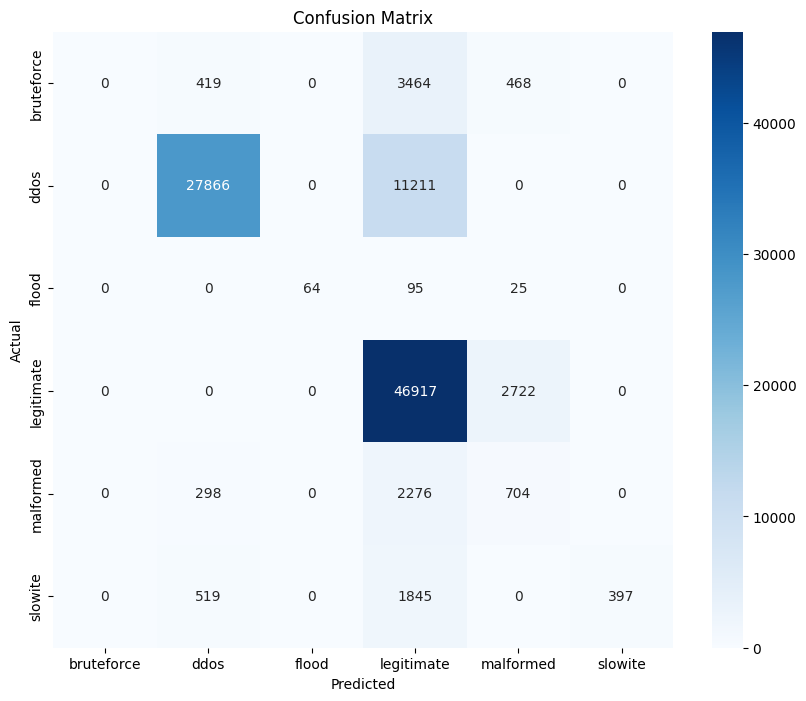

In [21]:

# Ocena modelu
# Wizualizacja macierzy pomyłek
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()